In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import files
uploaded = files.upload()   # upload your CSV here






Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv


In [ ]:
df = pd.read_csv("top_insta_influencers_data.csv")

In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (200, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

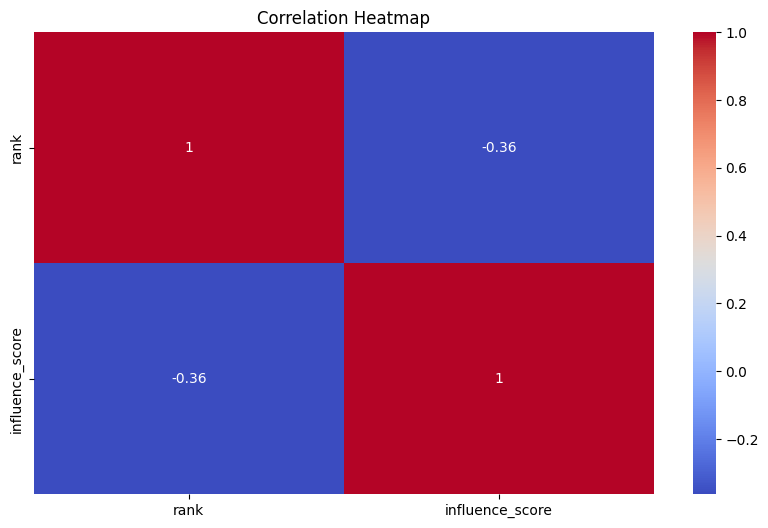

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-3185452998.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="followers", y="channel_info", data=top10, palette="viridis")


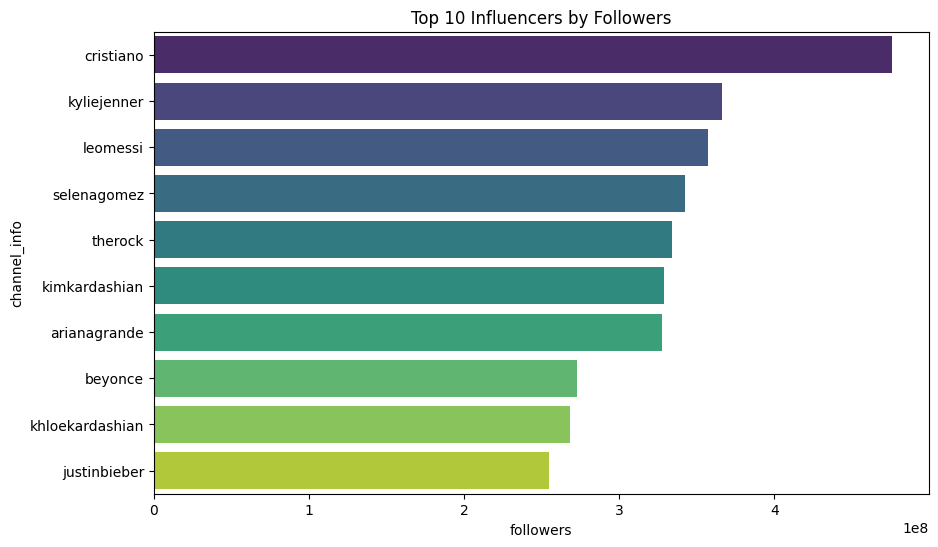

In [ ]:
df.columns = df.columns.str.strip()

def convert_followers(followers):
    if 'm' in str(followers).lower():
        return float(str(followers).lower().replace('m', '')) * 1_000_000
    elif 'k' in str(followers).lower():
        return float(str(followers).lower().replace('k', '')) * 1_000
    return float(followers)

df['followers'] = df['followers'].apply(convert_followers)

top10 = df.nlargest(10, "followers")
plt.figure(figsize=(10,6))
sns.barplot(x="followers", y="channel_info", data=top10, palette="viridis")
plt.title("Top 10 Influencers by Followers")
plt.show()

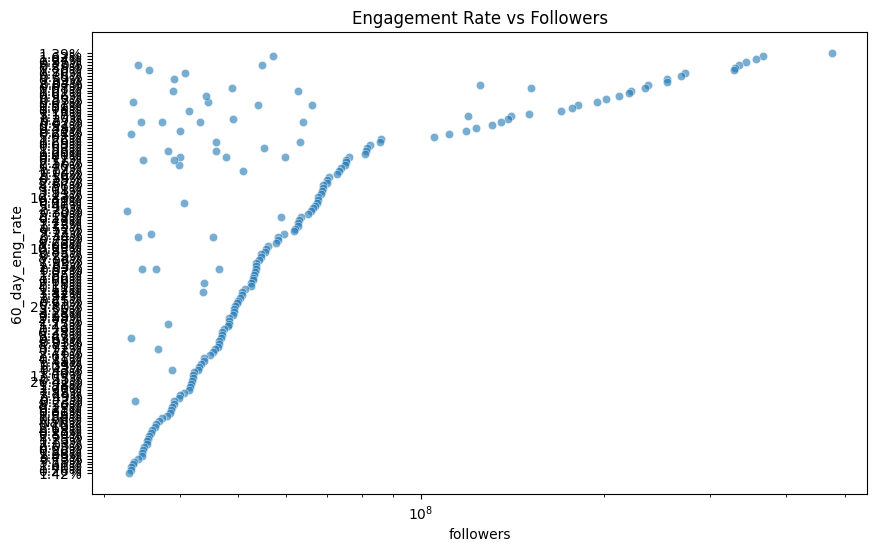

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="followers", y="60_day_eng_rate", data=df, alpha=0.6)
plt.xscale("log")
plt.title("Engagement Rate vs Followers")
plt.show()

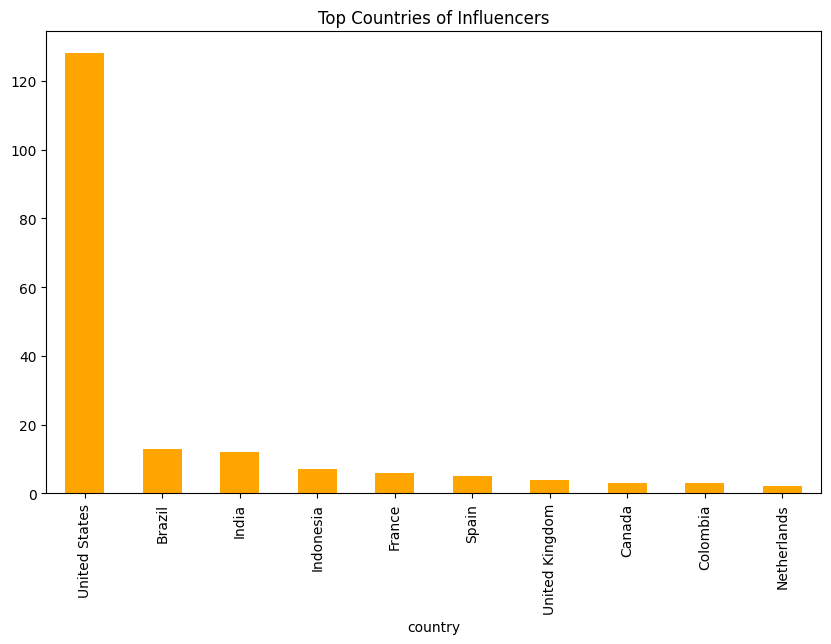

In [ ]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top Countries of Influencers")
plt.show()

In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_influencers.csv", index=False)

# Download to local
files.download("cleaned_influencers.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.describe(include="all")


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,200.000000,200,200.000000,200,2.000000e+02,200,200,200,200,200
unique,NaN,200,NaN,99,NaN,135,147,162,116,25
top,NaN,cristiano,NaN,10.0k,NaN,1.1m,0.02%,0,1.6b,United States
freq,NaN,1,NaN,13,NaN,13,5,8,9,128
mean,100.500000,NaN,81.820000,NaN,7.740950e+07,NaN,NaN,NaN,NaN,NaN
std,57.879185,NaN,8.878159,NaN,7.368727e+07,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,22.000000,NaN,3.280000e+07,NaN,NaN,NaN,NaN,NaN
25%,50.750000,NaN,80.000000,NaN,4.000000e+07,NaN,NaN,NaN,NaN,NaN
50%,100.500000,NaN,84.000000,NaN,5.005000e+07,NaN,NaN,NaN,NaN,NaN
75%,150.250000,NaN,86.000000,NaN,6.890000e+07,NaN,NaN,NaN,NaN,NaN


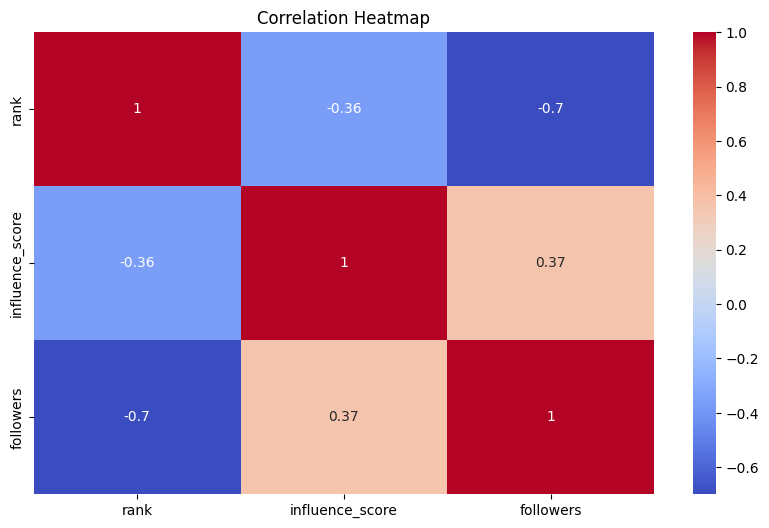

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-1555500841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="followers", y="channel_info", data=top10, palette="viridis")


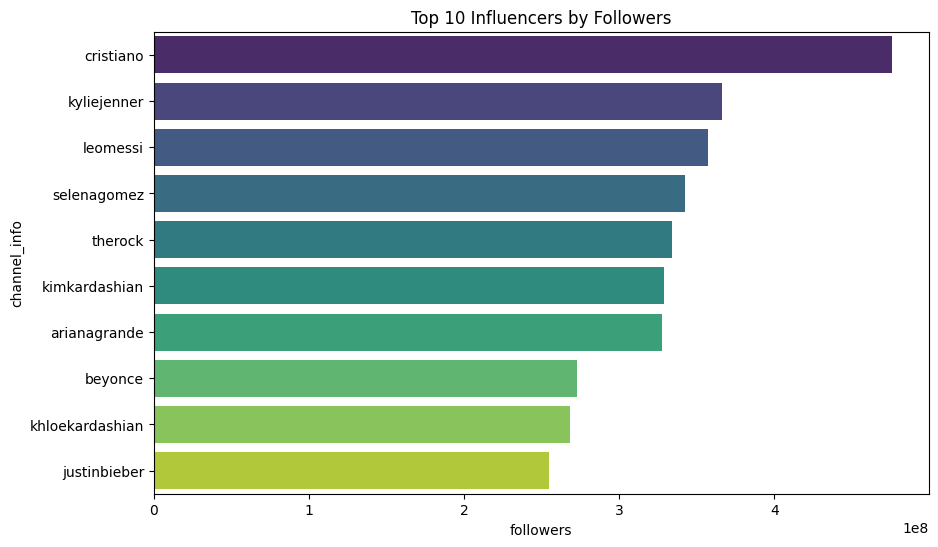

In [ ]:
top10 = df.nlargest(10, "followers")
plt.figure(figsize=(10,6))
sns.barplot(x="followers", y="channel_info", data=top10, palette="viridis")
plt.title("Top 10 Influencers by Followers")
plt.show()

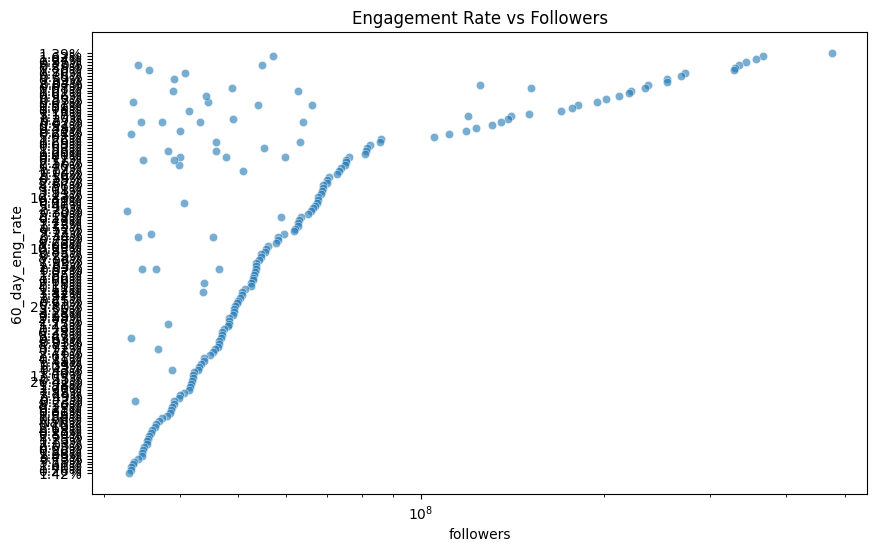

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="followers", y="60_day_eng_rate", data=df, alpha=0.6)
plt.xscale("log")
plt.title("Engagement Rate vs Followers")
plt.show()

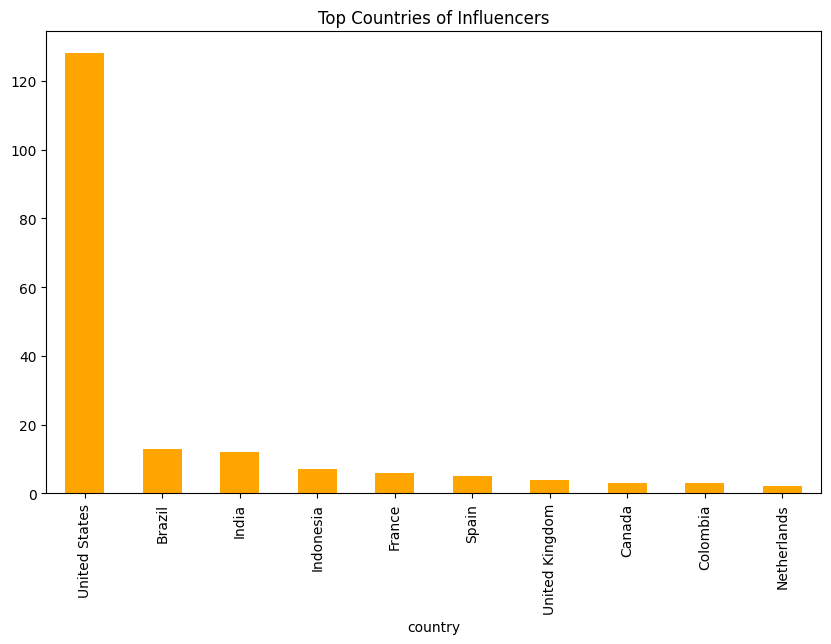

In [ ]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top Countries of Influencers")
plt.show()

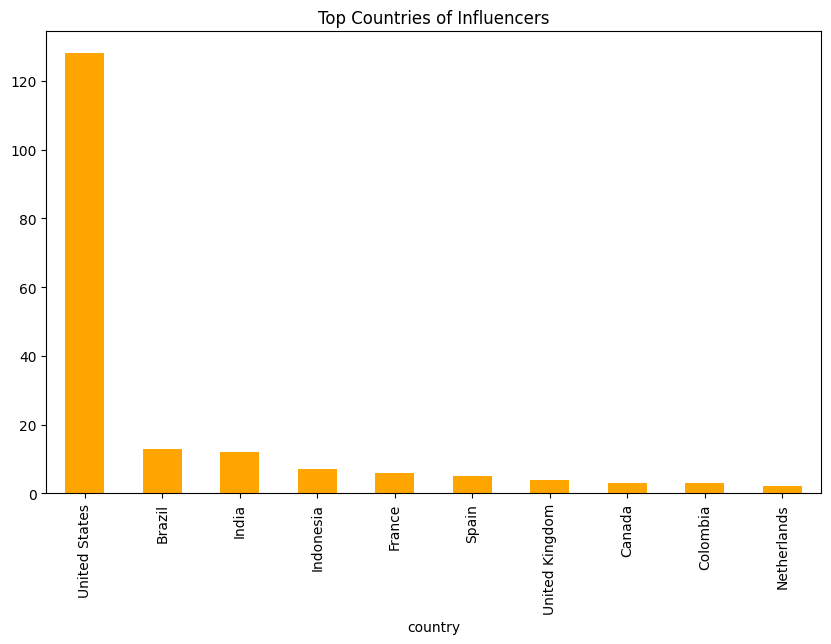

In [ ]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top Countries of Influencers")
plt.show()

In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_influencers.csv", index=False)

# Download to local
files.download("cleaned_influencers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>